In [1]:
import pandas as pd
import sys
sys.path.append('../src')
from prediktiv_analyse import hent_og_strukturer_data, legg_til_manglende_verdier, vis_manglende_verdier, tren_modell, vis_regresjon_resultat_scatter, vis_regresjon_resultat_søyle, vis_regresjon_resultat_linje, filtrer_byer

In [2]:
# Leser inn data fra BehandletVaerData.csv
df = pd.read_csv("../data/BehandletVaerData.csv")

# Finner duplikater der samme dato og variabel forekommer flere ganger i datasettet.
duplikater = df.groupby(['referenceTime', 'variable']).size().reset_index(name='antall')
duplikater = duplikater[duplikater['antall'] > 1]
duplikater

,referenceTime,variable,antall
0,2022-01-01,air_temperature P1D,3
1,2022-01-01,precipitation_amount P1D,3
2,2022-01-01,wind_speed P1D,2
3,2022-01-02,air_temperature P1D,3
4,2022-01-02,precipitation_amount P1D,3
...,...,...,...
1090,2022-12-30,precipitation_amount P1D,3
1091,2022-12-30,wind_speed P1D,2
1092,2022-12-31,air_temperature P1D,3
1093,2022-12-31,precipitation_amount P1D,3


In [3]:
# Viser byene vi jobber med
byer = filtrer_byer("../data/BehandletVaerData.csv")
print(byer)

# Henter og strukturerer data for valgt by. Her kan man endre bynavnet til ønsket by, og vil da få data for den byen.
df = hent_og_strukturer_data("../data/BehandletVaerData.csv", by="Oslo")

df.head()

['Oslo', 'Bergen', 'Trondheim']


variable,dato,temperatur,nedbør
0,2022-01-01,-2.3,0.0
1,2022-01-02,0.3,7.6
2,2022-01-03,1.1,0.1
3,2022-01-04,-2.6,0.6
4,2022-01-05,-2.4,0.0


# Prediktiv analyse – tre ulike fremstillinger

In [4]:
# Trener og forbereder modellen for temperatur
modell_temp, X_test_temp, y_test_temp, y_pred_temp, r2_temp, mape_temp = tren_modell(df, 'temperatur')
print(f"Temperatur - R²: {r2_temp:.2f}, MAPE: {mape_temp:.2%}")

# Trener og forbereder modellen for nedbør
modell_nedbor, X_test_nedbor, y_test_nedbor, y_pred_nedbor, r2_nedbor, mape_nedbor = tren_modell(df, 'nedbør')
print(f"Nedbør - R²: {r2_nedbor:.2f}, MAPE: {mape_nedbor:.2%}")

Temperatur - R²: -0.14, MAPE: 49357828961163488.00%
Nedbør - R²: -0.06, MAPE: 460860595674718208.00%


<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

Koden over trener og forbereder regresjonsmodellen vår som skal lage de predikerte verdiene vi skal sammenligne med de faktiske verdiene. Regresjonsmodellen vår i denne oppgaven er en lineær regresjonsmodell. Som vi også ser returnerer koden over en R2-verdi og en MAPE(Mean Absolute Percentage Error)-verdi som begge to gir oss en indikasjon på hvor godt egnet denne lineære regresjonsmodellen er for å predikere data basert på den historiske dataen vi har. Optimal R2-verdi er 1, og optimal MAPE-prosent er 0. Med andre ord er ikke lineær regresjon særlig godt egnet – som vi ser av R2- og MAPE-verdiene vi har fått – for å predikere værdata basert på historiske data, noe som gir mening fordi værets oppførsel er alt annet enn stabilt og lineært fra dag til dag. 
</div>

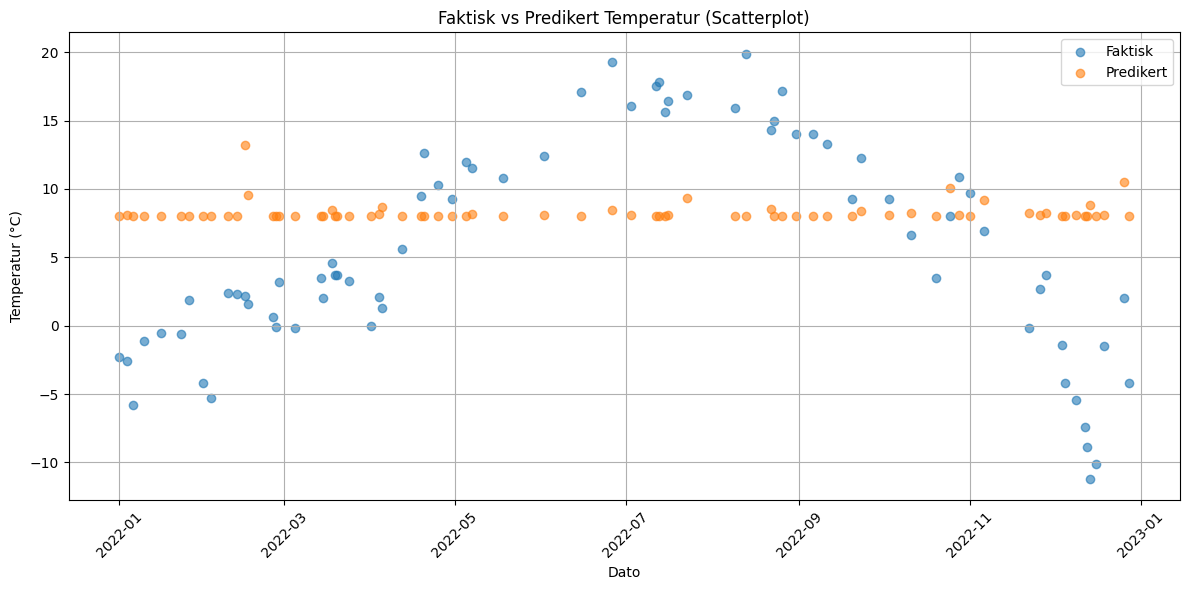

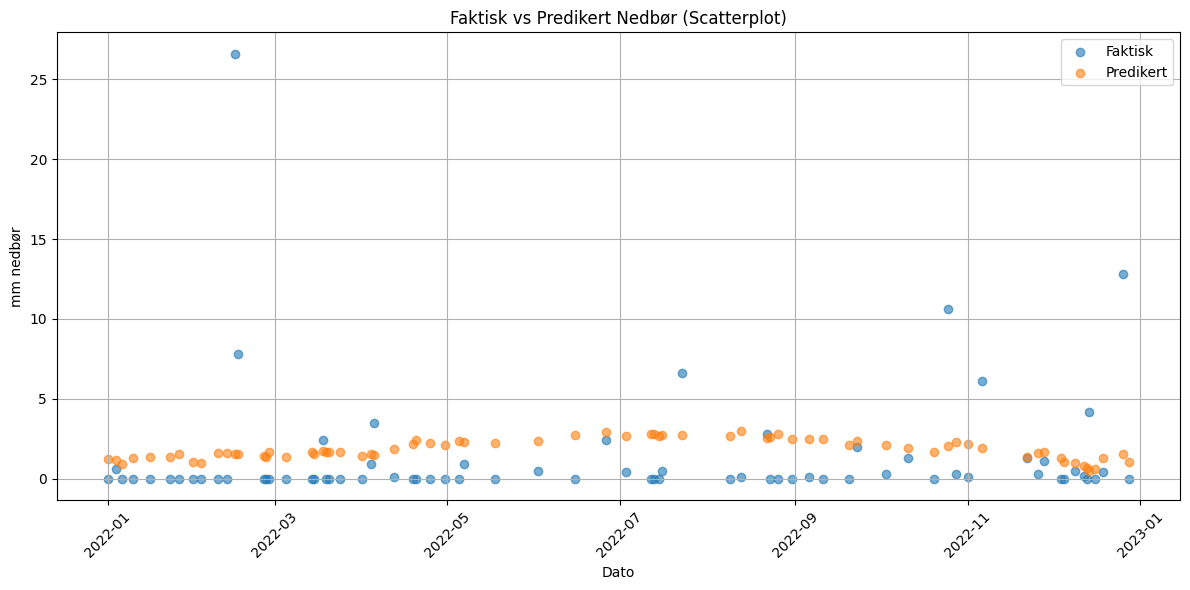

In [5]:
# Plotter regresjonsresultatene med scatterplot
vis_regresjon_resultat_scatter(X_test_temp, y_test_temp, y_pred_temp, df, 'temperatur')
vis_regresjon_resultat_scatter(X_test_nedbor, y_test_nedbor, y_pred_nedbor, df, 'nedbør')

<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

### Scatterplot – faktiske og predikerte verdier

Denne grafen viser en sammenligning mellom de faktiske observerte verdiene og de verdiene som modellen har predikert for samme tidsperiode. 

Scatterplot er en god visualiseringsmetode for denne typen data fordi det gir en tydelig og direkte visuell sammenligning mellom modellens prediksjoner og de virkelige dataene. Ved å plotte både faktiske og predikerte verdier i samme diagram kan vi raskt identifisere hvor god prediksjonen er, og eventuelle avvik eller feil i prediksjonene.

Dette hjelper oss å evaluere modellens ytelse på en intuitiv måte, spesielt når vi ønsker å se om prediksjonene følger de samme trendene som de faktiske målingene over tid. Hvis den predikerte dataen ligger tett opp til de faktiske dataene, indikerer det at modellen har høy nøyaktighet.

Videre kan vi visuelt oppdage eventuelle mønstre i feilene, som kan gi innsikt i hvordan modellen kan forbedres. Scatterplotet er dermed veldig nyttig for både evaluering og videreutvikling av regresjonsmodellen.


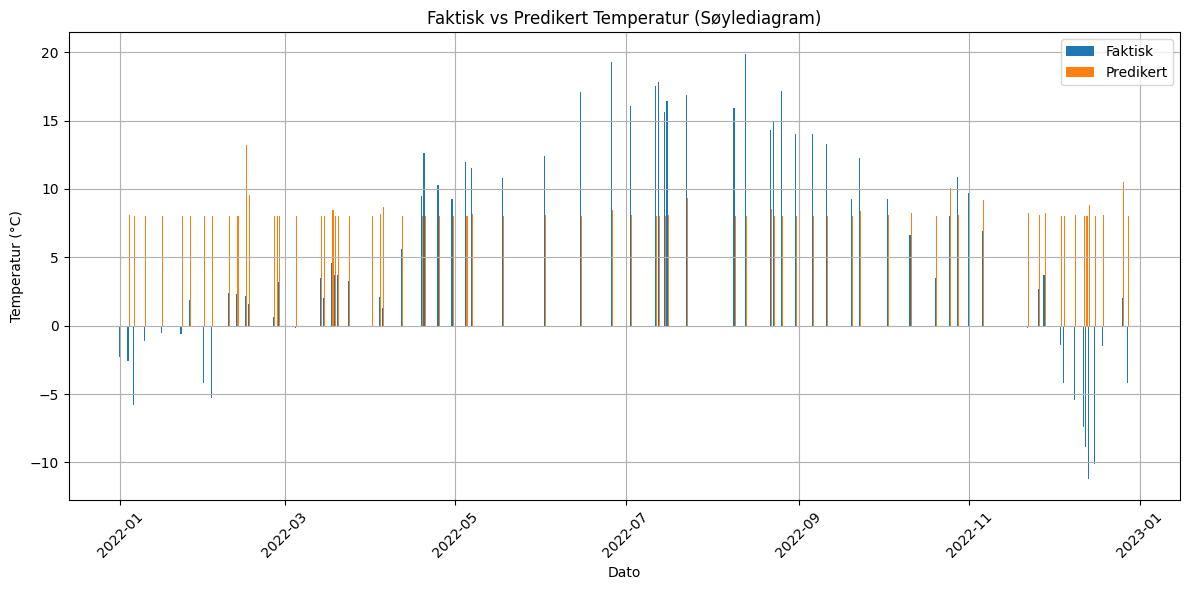

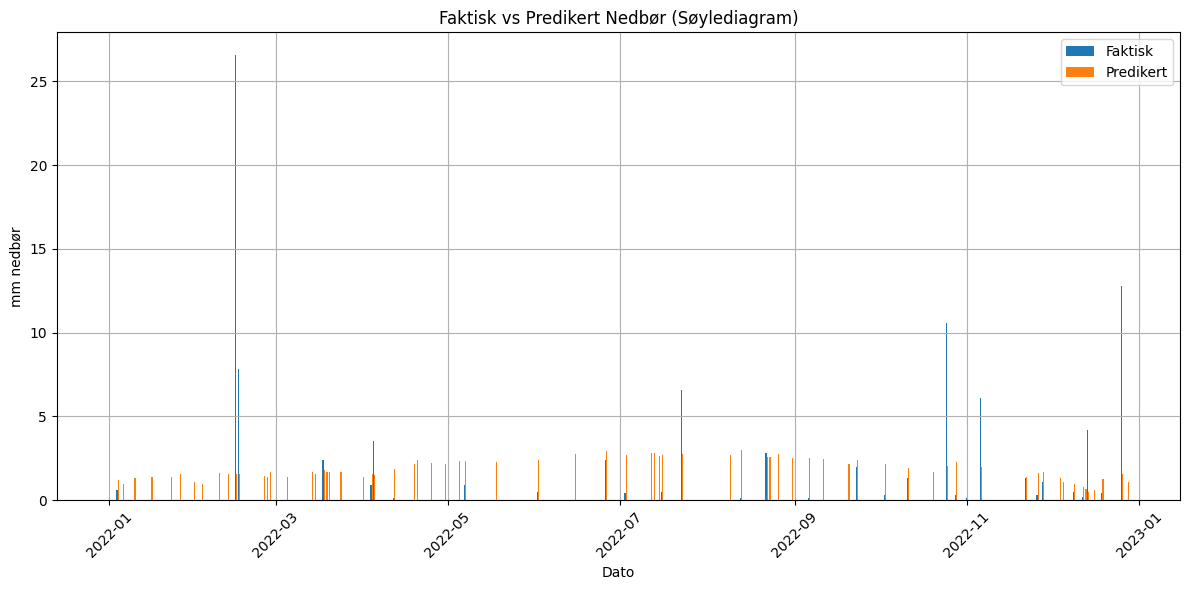

In [6]:
# Plotter regresjonsresultatene med søylediagram
vis_regresjon_resultat_søyle(X_test_temp, y_test_temp, y_pred_temp, df, 'temperatur')
vis_regresjon_resultat_søyle(X_test_nedbor, y_test_nedbor, y_pred_nedbor, df, 'nedbør')

<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

### Søylediagram – faktiske og predikerte verdier

Denne grafen viser en sammenligning mellom faktiske og predikerte verdier i form av et søylediagram over tid. Hver dato har to søyler – én for den faktiske verdien, og én for den predikerte verdien. 

Søylediagram er en effektiv måte å visualisere forskjeller mellom to verdier for hver enkelt observasjon, her dag. Det gjør det enkelt å sammenligne faktiske og predikerte verdier direkte for hver dag, og er nyttig når man ønsker å analysere prediksjonsfeil på detaljnivå.

Denne typen visualisering gjør det lett å identifisere avvik, for eksempel hvis modellen konsekvent over- eller underestimerer verdiene. I tillegg gir det en oversiktlig fremstilling som passer godt til presentasjoner og rapportering, der tydelighet og visuell kontrast mellom verdiene er viktig.

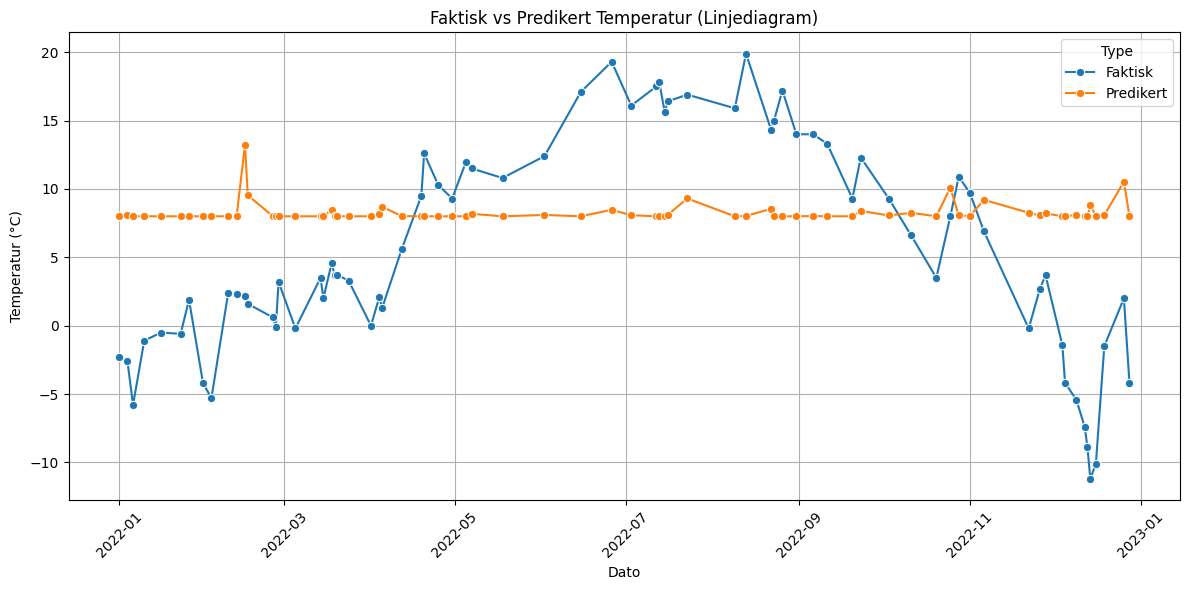

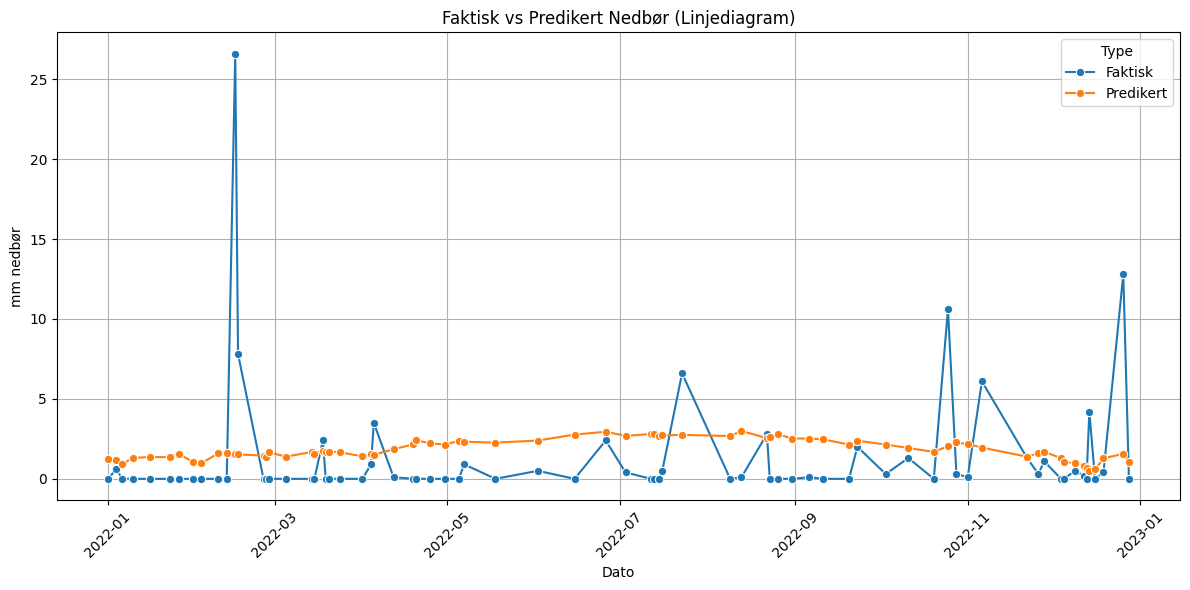

In [7]:
# Plotter regresjonsresultatene med linjediagram
vis_regresjon_resultat_linje(X_test_temp, y_test_temp, y_pred_temp, df, 'temperatur')
vis_regresjon_resultat_linje(X_test_nedbor, y_test_nedbor, y_pred_nedbor, df, 'nedbør')

<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

### Linjediagram – faktiske og predikerte verdier

Denne grafen viser utviklingen av både faktiske og predikerte verdier over tid i et linjediagram. 

Linjediagrammet er godt egnet til å identifisere trender og mønstre over tid, og er derfor spesielt nyttig for å vurdere om modellen klarer å fange opp de underliggende trendene i dataene. Når de to linjene følger hverandre tett, indikerer det at modellen har høy prediksjonspresisjon.

Ved hjelp av linjediagrammet kan man også enklere identifisere tidsperioder der modellen presterer dårligere, for eksempel under plutselige endringer eller ekstreme verdier. Dette gir innsikt i modellens styrker og svakheter, og gir et godt utgangspunkt for videre forbedringer.

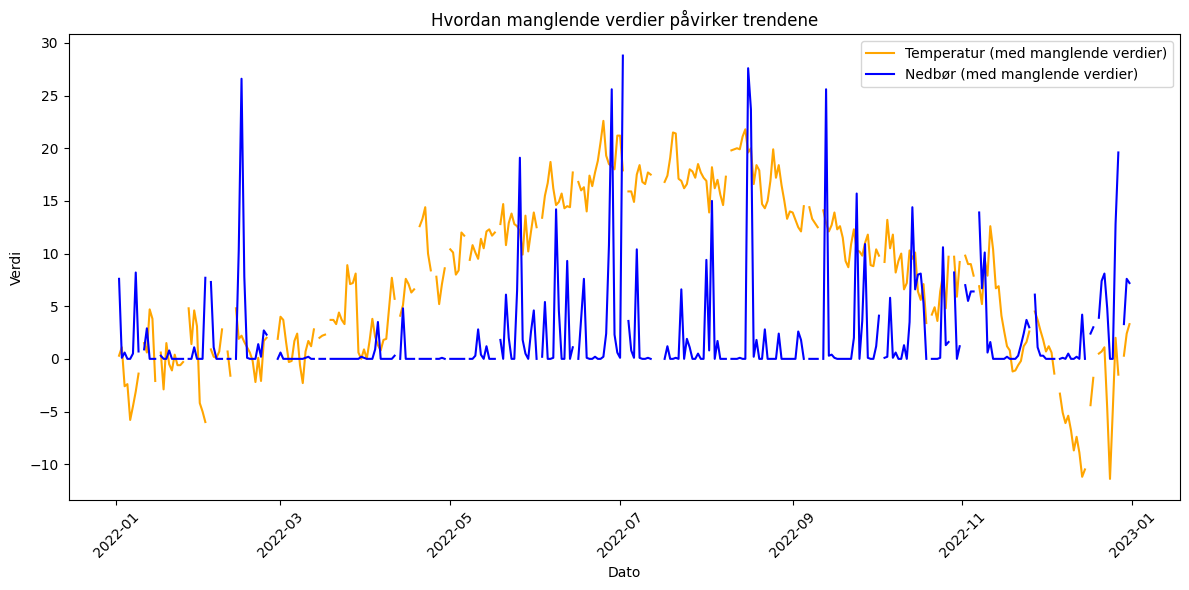

In [ ]:
# Legger til NaN-verdier i datasettet
df_mangler = legg_til_manglende_verdier(df)  # df er det originale datasettet vi brukte tidligere
vis_manglende_verdier(df_mangler)

<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

### Hvordan manglende verdier påvirker tolkning av data

Denne grafen viser temperatur og nedbør over tid, men med innlagte manglende verdier (NaN) i omtrent 10 % av observasjonene. Manglende verdier forstyrrer kontinuiteten i dataseriene og gjør det vanskeligere å se trender tydelig. I områder der verdier mangler, oppstår det hull i grafen. Dette kan føre til misvisende tolkninger, særlig hvis manglene ikke er tilfeldig fordelt, men f.eks. forekommer i bestemte måneder eller perioder. Det er derfor viktig å håndtere slike mangler på en bevisst måte før man trener modeller.

<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

## Evaluering av visualiseringene

I oppgave 6 har vi laget tre hovedtyper visualiseringer:

1. **Linjediagrammer** for å vise endringer i temperatur og nedbør over tid.
2. **Søylediagrammer** for å illustrere verdier per observasjon (dag) for temperatur og nedbør.
3. **Scatterplot** for å vise sammenhengen mellom temperatur og nedbør.

**Linjediagrammene** var de mest effektive for å identifisere trender over tid. De gjør det lett å se hvordan temperatur og nedbør varierer gjennom året, og gir et godt visuelt bilde av sesongmessige mønstre. **Søylediagrammene** gir et detaljert bilde av enkeltobservasjoner. De fungerer godt når man ønsker å se konkrete dagverdier, men blir fort overveldende når datasettet er stort. **Scatterplottet** er en god visualiseringsmetode for denne typen data fordi det gir en tydelig og direkte visuell sammenligning mellom modellens prediksjoner og de virkelige dataene. Å evaluere modellens ytelse kan gjøres på en intuitiv måte ved å se sammenhengen mellom temperatur og nedbør på samme datoer. 

### Håndtering av manglende verdier
Visualiseringen av datasettet med manglende verdier viste tydelig hvordan slike hull kan påvirke tolkningen. Hullene i grafen gjør at kontinuiteten forsvinner, og det blir vanskelig å trekke konklusjoner om trender i perioder med mange manglende målinger.

### Refleksjon
Basert på veiledning og egne vurderinger har vi kommet frem til at linjediagrammer er mest egnet for å formidle utvikling over tid i dette datasettet. Vi har også erfart viktigheten av å kontrollere for manglende data tidlig i analyseprosessen, ettersom det kan påvirke både visualiseringer og maskinlæringsmodeller. I dette tilfellet ser vi at det er ingen sterk lineær sammenheng mellom faktiske og predikerte verdier, noe som er nyttig informasjon før man velger prediksjonsmetode.